In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import statsmodels.tsa.tsatools as tsatools

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math

F:\AnacondaPython\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = pd.read_csv('../Data/Kontor_Tuketim.csv')
data.head()

,MUSTERI,EFATURA_AKTIVASYONTARIHI,KONTOR_TARIHI,TIP,YAKILAN_KONTOR
0,13,2015-03-26,2014-12-11,eArsiv,0.5
1,13,2015-03-26,2014-12-15,eArsiv,0.5
2,13,2015-03-26,2014-12-16,eArsiv,3.5
3,13,2015-03-26,2014-12-17,eArsiv,0.5
4,13,2015-03-26,2014-12-18,eArsiv,11.0


In [3]:
data.isna().sum()

MUSTERI                     0
EFATURA_AKTIVASYONTARIHI    0
KONTOR_TARIHI               0
 TIP                        0
YAKILAN_KONTOR              0
dtype: int64

In [4]:
data.rename(columns={' TIP': 'TIP'}, inplace=True)
data['TIP'].value_counts()

eFatura      9578922
eArsiv        833804
Mailing       466029
eDefter       101057
Mutabakat      34822
eEkstre        11836
SMS             3264
Saklama         1502
eİrsaliye        627
LogoPay          108
Crif               7
Name: TIP, dtype: int64

In [5]:
data = data[data['TIP']=='eArsiv']
data.head()

,MUSTERI,EFATURA_AKTIVASYONTARIHI,KONTOR_TARIHI,TIP,YAKILAN_KONTOR
0,13,2015-03-26,2014-12-11,eArsiv,0.5
1,13,2015-03-26,2014-12-15,eArsiv,0.5
2,13,2015-03-26,2014-12-16,eArsiv,3.5
3,13,2015-03-26,2014-12-17,eArsiv,0.5
4,13,2015-03-26,2014-12-18,eArsiv,11.0


In [6]:
data['KONTOR_TARIHI'] = pd.to_datetime(data['KONTOR_TARIHI'])
data = data[['KONTOR_TARIHI', 'YAKILAN_KONTOR']]
data.set_index('KONTOR_TARIHI', inplace=True)
data.sort_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 833804 entries, 2014-10-21 to 2018-11-22
Data columns (total 1 columns):
YAKILAN_KONTOR    833804 non-null float64
dtypes: float64(1)
memory usage: 12.7 MB


In [7]:
data = data.resample('24h', base=0).sum()
data.head()

,YAKILAN_KONTOR
KONTOR_TARIHI,
2014-10-21,4.0
2014-10-22,1.0
2014-10-23,0.5
2014-10-24,1.0
2014-10-25,1.5


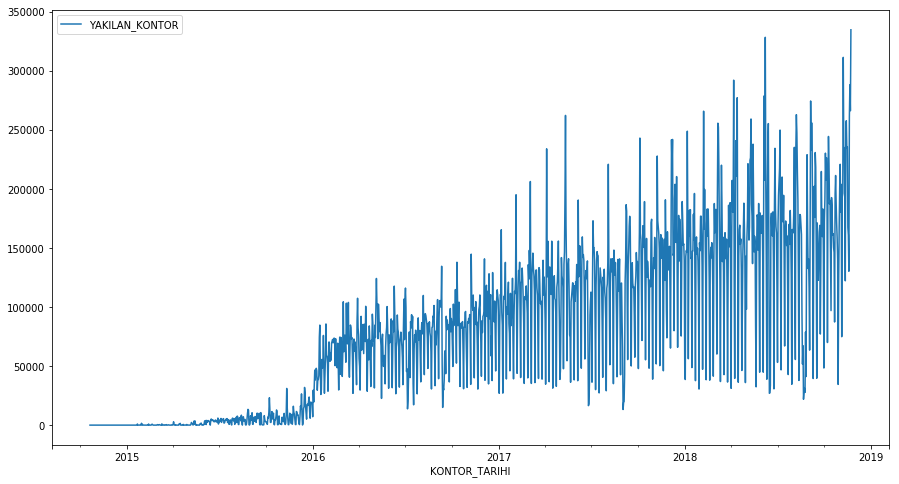

In [8]:
data.plot(figsize=(15,8))

In [9]:
normal_data = data.copy()

In [10]:
data['YAKILAN_KONTOR'] = data['YAKILAN_KONTOR'].diff().fillna(0)
data.head()

,YAKILAN_KONTOR
KONTOR_TARIHI,
2014-10-21,0.0
2014-10-22,-3.0
2014-10-23,-0.5
2014-10-24,0.5
2014-10-25,0.5


In [11]:
data.tail()

,YAKILAN_KONTOR
KONTOR_TARIHI,
2018-11-18,-30651.0
2018-11-19,130767.0
2018-11-20,27045.0
2018-11-21,-21955.0
2018-11-22,68547.0


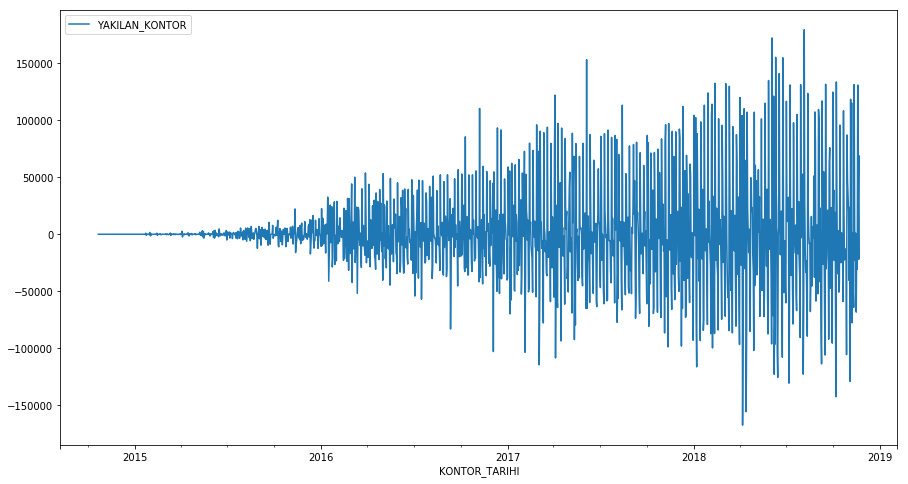

In [12]:
data.plot(figsize=(15,8))

In [13]:
scaler = MinMaxScaler()
data['YAKILAN_KONTOR'] = scaler.fit_transform(data['YAKILAN_KONTOR'].values.reshape(-1, 1))

In [14]:
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

data = timeseries_to_supervised(data, 90)
data.head()

,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,...,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR,YAKILAN_KONTOR
KONTOR_TARIHI,,,,,,,,,,,,,,,,,,,,,
2014-10-21,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482793
2014-10-22,0.482793,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482784
2014-10-23,0.482784,0.482793,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482792
2014-10-24,0.482792,0.482784,0.482793,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482794
2014-10-25,0.482794,0.482792,0.482784,0.482793,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.482794


In [35]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X = X.reshape((X.shape[0], 1, X.shape[1]))

1494
1494


In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation="tanh"))
model.compile(loss="mse", optimizer="adam")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 32)             15744     
_________________________________________________________________
dropout (Dropout)            (None, 1, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 24,097
Trainable params: 24,097
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X, 
                    y,
                    epochs=100,
                    batch_size=128,
                    verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10),
                               tf.keras.callbacks.ReduceLROnPlateau()],
                    validation_split=0.2)

Train on 1195 samples, validate on 299 samples
Epoch 1/100
1195/1195 [==============================] - 2s 1ms/step - loss: 0.1613 - val_loss: 0.0994
Epoch 2/100
1195/1195 [==============================] - 0s 30us/step - loss: 0.0462 - val_loss: 0.0375
Epoch 3/100
1195/1195 [==============================] - 0s 29us/step - loss: 0.0270 - val_loss: 0.0452
Epoch 4/100
1195/1195 [==============================] - 0s 28us/step - loss: 0.0260 - val_loss: 0.0372
Epoch 5/100
1195/1195 [==============================] - 0s 29us/step - loss: 0.0219 - val_loss: 0.0371
Epoch 6/100
1195/1195 [==============================] - 0s 28us/step - loss: 0.0207 - val_loss: 0.0363
Epoch 7/100
1195/1195 [==============================] - 0s 28us/step - loss: 0.0185 - val_loss: 0.0363
Epoch 8/100
1195/1195 [==============================] - 0s 30us/step - loss: 0.0190 - val_loss: 0.0358
Epoch 9/100
1195/1195 [==============================] - 0s 28us/step - loss: 0.0178 - val_loss: 0.0355
Epoch 10/100
1195/

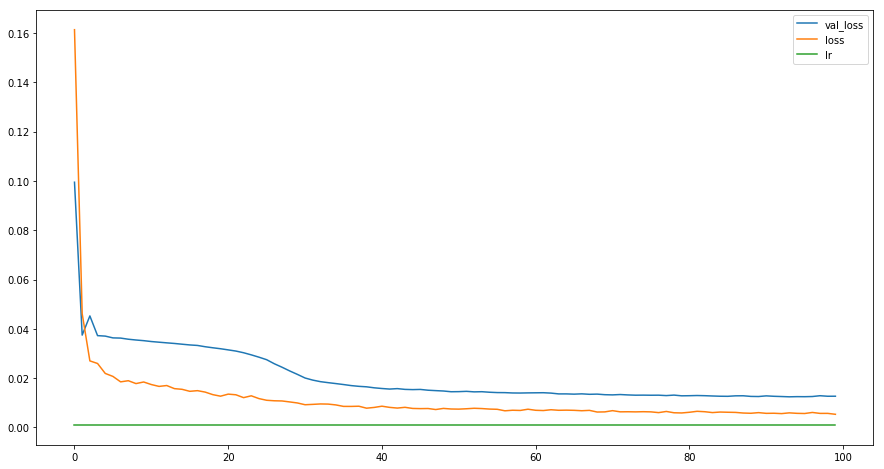

In [18]:
plt.figure(figsize=(15,8))
for key in history.history:
    plt.plot(history.history[key], label=key)
plt.legend()
plt.show()

In [19]:
test_X = X[-365:]
test_y = y[-365:]

In [20]:
predictions=model.predict(test_X).flatten()

In [21]:
inv_pred=scaler.inverse_transform(predictions.reshape(-1, 1))
inv_test_y=scaler.inverse_transform(test_y.reshape(-1, 1))

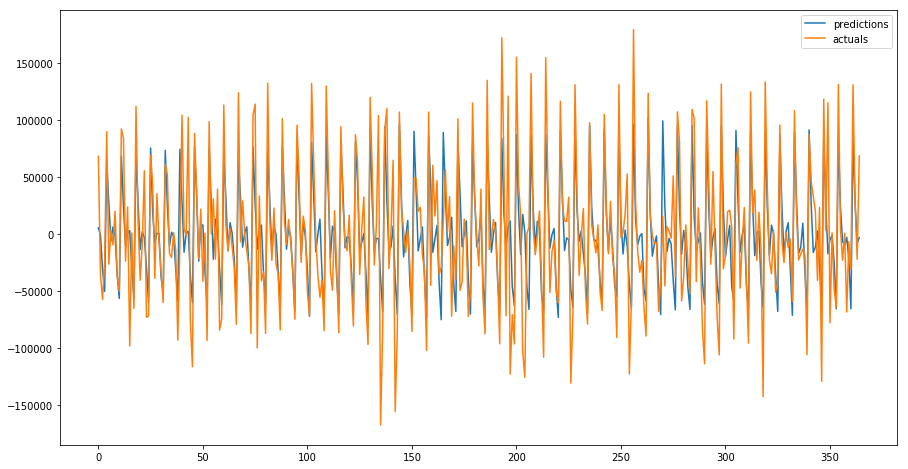

In [22]:
plt.figure(figsize=(15,8))
plt.plot(inv_pred, label='predictions')
plt.plot(inv_test_y, label='actuals')
plt.legend()
plt.show()

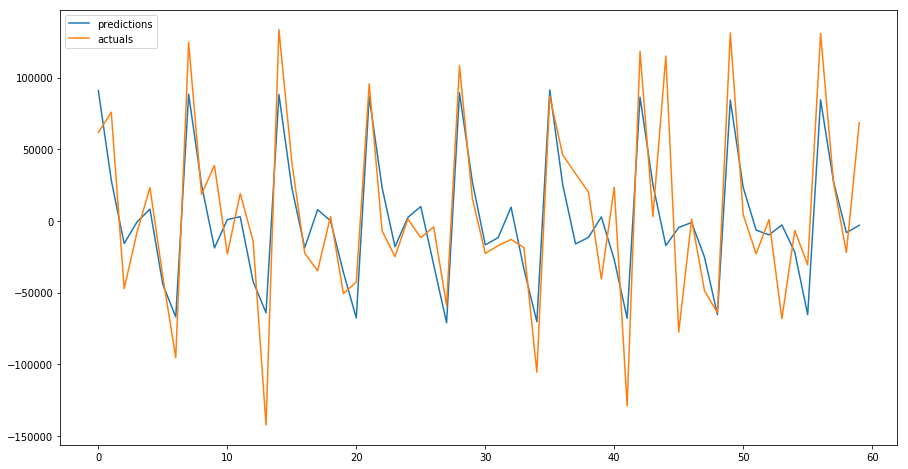

In [23]:
plt.figure(figsize=(15,8))
plt.plot(inv_pred[-60:], label='predictions')
plt.plot(inv_test_y[-60:], label='actuals')
plt.legend()
plt.show()

In [24]:
rmse=math.sqrt(mean_squared_error(inv_test_y, inv_pred))
print("365 günlük rmse")
rmse

365 günlük rmse


38505.60175180778

In [25]:
resampled_predictions=pd.DataFrame(data=inv_pred, index=normal_data.index.copy()[-365:]).resample('MS').sum()
resampled_actuals=pd.DataFrame(data=inv_test_y, index=normal_data.index.copy()[-365:]).resample('MS').sum()

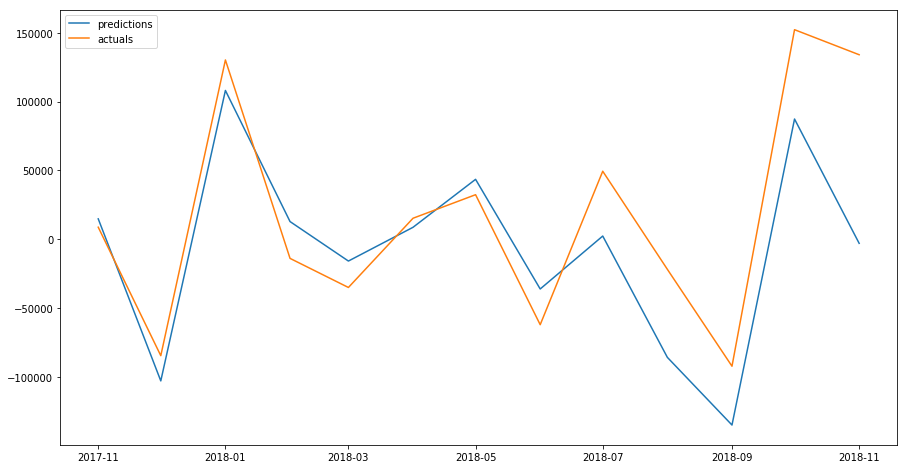

In [26]:
plt.figure(figsize=(15,8))
plt.plot(resampled_predictions, label='predictions')
plt.plot(resampled_actuals, label='actuals')
plt.legend()
plt.show()

In [27]:
rmse=math.sqrt(mean_squared_error(resampled_actuals, resampled_predictions))
print("Aylık rmse")
rmse

Aylık rmse


51094.527199072916